### 2-Traffic demand analysis ipynb (standard approach)

#### Contents
##### 1. Load clean dataset
##### 2. Convert value to numeric value
##### 3. View dataset statistic
##### 4. Features correlation
##### 5. Split train and test
##### 6. Model initialization for linear regression, decision tree, and random forest
##### 7. K-Fold validation intialization
##### 8. Display boxplot for RMSE result
##### 9. Linear Regression Analysis (MAE, RMSE, Fitting time)
##### 10. Decision Tree Analysis (MAE, RMSE, Fitting time)
##### 11. Random Forest Analysis (MAE, RMSE, Fitting time)
##### 12. Save model to file
##### 12. Load and test the model

#### 1. Load clean dataset

In [ ]:
import pandas as pd
df = pd.read_csv("combine.csv", names=["east", "north", "south", "west", "day", "hour", "minute", "demand"], dtype="unicode", engine='python')

#### 2. Convert value to numeric value

In [4]:
columns = ["east", "north", "south", "west", "day", "hour", "minute", "demand"]
for col in columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dtypes

east      float64
north     float64
south     float64
west      float64
day         int64
hour        int64
minute      int64
demand    float64
dtype: object

#### 3. View dataset statistic

In [7]:
df.describe()

,east,north,south,west,day,hour,minute,demand
count,4.206321e+06,4.206321e+06,4.206321e+06,4.206321e+06,4.206321e+06,4.206321e+06,4.206321e+06,4.206321e+06
mean,9.076961e+01,-5.344682e+00,-5.350175e+00,9.075862e+01,3.145299e+01,9.816315e+00,2.245206e+01,1.050907e-01
std,1.027662e-01,5.670886e-02,5.670886e-02,1.027662e-01,1.768278e+01,6.536769e+00,1.677580e+01,1.592655e-01
min,9.059326e+01,-5.482178e+00,-5.487671e+00,9.058228e+01,1.000000e+00,0.000000e+00,0.000000e+00,3.092217e-09
25%,9.068115e+01,-5.388794e+00,-5.394287e+00,9.067017e+01,1.600000e+01,4.000000e+00,0.000000e+00,1.867379e-02
50%,9.075806e+01,-5.344849e+00,-5.350342e+00,9.074707e+01,3.200000e+01,9.000000e+00,1.500000e+01,5.043463e-02
75%,9.085693e+01,-5.300903e+00,-5.306396e+00,9.084595e+01,4.700000e+01,1.400000e+01,3.000000e+01,1.208644e-01
max,9.097778e+01,-5.234985e+00,-5.240479e+00,9.096680e+01,6.100000e+01,2.300000e+01,4.500000e+01,1.000000e+00


#### 4. Features correlation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,east,north,south,west,day,hour,minute,demand
east,1.0,0.14,0.14,1.0,0.01,-0.08,-0.0004,-0.032
north,0.14,1.0,1.0,0.14,-0.0037,0.024,-0.00027,-0.022
south,0.14,1.0,1.0,0.14,-0.0037,0.024,-0.00027,-0.022
west,1.0,0.14,0.14,1.0,0.01,-0.08,-0.0004,-0.032
day,0.01,-0.0037,-0.0037,0.01,1.0,-3.1e-05,0.00012,0.024
hour,-0.08,0.024,0.024,-0.08,-3.1e-05,1.0,0.0025,-0.085
minute,-0.0004,-0.00027,-0.00027,-0.0004,0.00012,0.0025,1.0,-0.0027
demand,-0.032,-0.022,-0.022,-0.032,0.024,-0.085,-0.0027,1.0


#### 5. Split train and test

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
features = df[["east", "north", "south", "west", "day", "hour", "minute"]]
labels = df['demand']
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

#### 6. Model initialization for linear regression, decision tree, and random forest

In [12]:
models = []
models.append(('LR', linreg))
models.append(('DT', desreg))
models.append(('RF', rfreg))

#### 7. K-Fold validation intialization

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
results = []
names = []
scoring = "neg_mean_squared_error"

for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = np.sqrt(abs(cross_val_score(model, train, train_labels, cv=kfold, scoring=scoring)))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.158662 (0.000247)
DT: 0.044481 (0.000173)
RF: 0.036016 (0.000131)


#### 8. Display boxplot for RMSE result

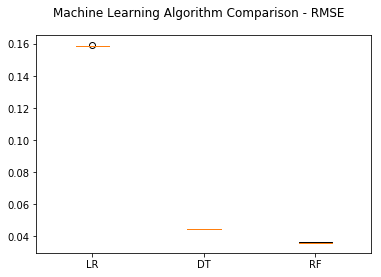

In [14]:
from matplotlib import pyplot
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Algorithm Comparison - RMSE')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### 9. Linear Regression Analysis (MAE, RMSE, Fitting time)

In [24]:
import time
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
linreg = LinearRegression()
start = time.time()
linreg.fit(train, train_labels)
end = time.time()
y_pred = linreg.predict(test)
print("MAE: ", metrics.mean_absolute_error(test_labels, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print("Linear regression: ", linreg.score(train,train_labels))
print("Model Fitting Time: "+ str(end - start) + " s")

MAE:  0.09618556721545037
RMSE:  0.15785783573942375
Linear regression:  0.009491397089042453
Model Fitting Time: 0.8135457038879395 s


#### 10. Decision Tree Analysis (MAE, RMSE, Fitting time)

In [25]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
desreg = DecisionTreeRegressor()
start = time.time()
desreg.fit(train, train_labels)
end = time.time()
y_pred = desreg.predict(test)
print("MAE: ", metrics.mean_absolute_error(test_labels, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print("Decision Tree Regressor: ", desreg.score(train,train_labels))
print("Model Fitting Time: "+ str(end - start) + " s")

MAE:  0.026648058048129215
RMSE:  0.04213670991350162
Decision Tree Regressor:  0.9999999425343996
Model Fitting Time: 21.693514108657837 s


#### 11. Random Forest Analysis (MAE, RMSE, Fitting time)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score
rfreg = RandomForestRegressor()
start = time.time()
rfreg.fit(train, train_labels)
end = time.time()
y_pred = rfreg.predict(test)
print("MAE: ", metrics.mean_absolute_error(test_labels, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print("Random Forest Regressor: ", rfreg.score(train,train_labels))
print("Model Fitting Time: "+ str(end - start) + " s")

MAE:  0.021980648830291754
RMSE:  0.034359038855655485
Random Forest Regressor:  0.9916776031132312
Model Fitting Time: 167.23672533035278 s


#### 12. Save model to file

In [29]:
import pickle
filename = 'rf-traffic-demand.sav'
pickle.dump(rfreg, open(filename, 'wb'))

#### 12. Load and test the model

In [33]:
filename = 'rf-traffic-demand.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(test)
print("MAE: ", metrics.mean_absolute_error(test_labels, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print("Random Forest Regressor: ", loaded_model.score(test,test_labels))

MAE:  0.021980648830291754
RMSE:  0.034359038855655485
Random Forest Regressor:  0.9530939899789462
